### problem 2 (a)

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import my_ml.Ridge as MR
import matplotlib.pyplot as plt

In [4]:
exp_data = np.loadtxt(fname = "expression.txt")
SNP_data = np.loadtxt(fname = "SNPs.txt")
gene_list = np.loadtxt(fname = "gene_list.txt", dtype = "str")
strain_list = np.loadtxt(fname = "strain_list.txt", dtype = "str")

In [5]:
### index is 394

In [6]:
coeffs = []
lin_reg = LinearRegression()
for i in range (SNP_data.shape[1]):
    lin_reg.fit(SNP_data[:,i].reshape(-1,1), exp_data[:, 394].reshape(-1,1))
    coeff = lin_reg.coef_.tolist()
    coeffs.append(coeff[0][0])

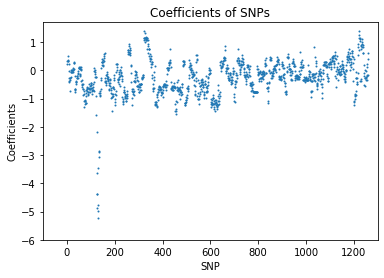

In [7]:
x = [i for i in range(1,1261)]
plt.scatter(x,coeffs,s=1)
plt.axis([-100, 1300, -6, 1.7])
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs")
plt.savefig('21')
plt.show()

### problem 2(b)

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(SNP_data[:,:2], exp_data[:, 394].reshape(-1,1))
print(lin_reg2.coef_)

[[ 2.95599107 -2.66590351]]


### problem 2(c)

[ 0.02682344 -0.00296702  0.02682344 ... -0.08481259 -0.03152819
 -0.02540185]
[ 0.0222465  -0.00977896  0.0222465  ... -0.06442788 -0.02861778
 -0.02572554]
[ 0.02682344 -0.00296702  0.02682344 ... -0.08481259 -0.03152819
 -0.02540185]


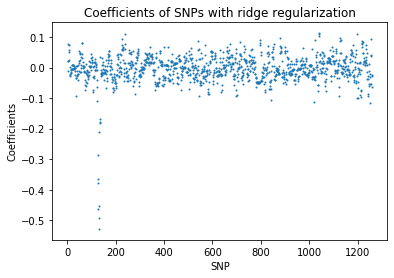

In [14]:
lin_ridge = Ridge(alpha=0.2)
coeffs3 = []
lin_ridge.fit(SNP_data, exp_data[:,394])
coeffs3 = lin_ridge.coef_
print(coeffs3)

coeffs3my =[]
lin_ridge_my = MR.Ridge(alpha=0.2)
coeffs3my = []
lin_ridge_my.fit_normal(SNP_data, exp_data[:,394])
coeffs3my = lin_ridge_my.coef_
print(coeffs3my)

print(RidgeRegression(SNP_data, exp_data[:,394],0.2))

plt.scatter(x,coeffs3my,s=1)
# plt.axis([-100, 1300, -6, 1.7])
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs with ridge regularization")
plt.savefig("22")
plt.show()

[ 1.41993860e-02  3.06107134e-03  1.41993860e-02 ... -2.58230577e-02
 -4.39459168e-03  3.39028129e-05]
[0.03169511 0.01965232 0.03169511 ... 0.00210398 0.02242883 0.02655968]
[ 1.41993860e-02  3.06107134e-03  1.41993860e-02 ... -2.58230577e-02
 -4.39459168e-03  3.39028129e-05]


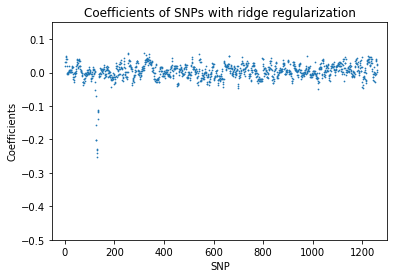

In [13]:
lin_ridge = Ridge(alpha=200)
coeffs4 = []
lin_ridge.fit(SNP_data, exp_data[:,394])
coeffs4 = lin_ridge.coef_
print(coeffs4)

coeffs4my =[]
lin_ridge_my = MR.Ridge(alpha=200)
coeffs4my = []
lin_ridge_my.fit_normal(SNP_data, exp_data[:,394])
coeffs4my = lin_ridge_my.coef_
print(coeffs4my)

print(RidgeRegression(SNP_data, exp_data[:,394],200))

plt.scatter(x,coeffs4my,s=0.5)
plt.axis([-50, 1300, -0.5, 0.15])
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs with ridge regularization")
plt.savefig("23")
plt.show()


### Submission

In [1]:
#import necessary package
import numpy as np
import matplotlib.pyplot as plt

#load the files
exp_data = np.loadtxt(fname = "expression.txt")
SNP_data = np.loadtxt(fname = "SNPs.txt")

#function for solving linear regression with formula
def LinearRegression(X_train, y_train):
    #mean centering the data
    X = X_train-np.mean(X_train,axis = 0)
    y = y_train-np.mean(y_train,axis = 0)

    # based on the closed form expression, compute the result directly
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return theta

#function for solving ridge regression with formula
def RidgeRegression(X_train, y_train, alpha):
    # mean centering the data
    X = X_train-np.mean(X_train,axis = 0)
    y = y_train-np.mean(y_train,axis = 0)
    
    # based on the closed form expression, compute the result directly
    theta= (np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[1]))
            .dot(X.T).dot(y)
           )

    return theta

#2(a)
#compute each SNP using for loop
coeffs = []
for i in range (SNP_data.shape[1]):
    coeff = LinearRegression(SNP_data[:,i].reshape(-1,1), 
                             exp_data[:, 394].reshape(-1,1))
    coeffs.append(coeff[0])

#draw the figures
x = [i for i in range(1,1261)]
plt.scatter(x,coeffs,s=1)
plt.axis([-100, 1300, -6, 1.7])
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs")
plt.savefig('21')

#2(b)
coeffs2 = LinearRegression(SNP_data[:,:2], exp_data[:, 394].reshape(-1,1))
print(coeffs2)

#2(c)
    #2(c).1
    #set parameters
sigma = 1.0
sigma_w = 5.0
alpha = sigma / sigma_w
coeffs3 = RidgeRegression(SNP_data, exp_data[:,394],alpha)
    
    #plot the figure
plt.scatter(x,coeffs3,s=1)
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs with ridge regularization")
plt.savefig("22")

    #2(c).2
    #set parameters
sigma = 1.0
sigma_w = 0.005
alpha = sigma / sigma_w
coeffs4 = RidgeRegression(SNP_data, exp_data[:,394],alpha)
    
    #plot the figure
plt.scatter(x,coeffs4,s=0.5)
plt.axis([-50, 1300, -0.5, 0.15])
plt.xlabel("SNP")
plt.ylabel("Coefficients")
plt.title("Coefficients of SNPs with ridge regularization")
plt.savefig("23")

[[ 2.95599107]
 [-2.66590351]]
